Continuation: Epidemic Models and Parameter Optimization, Christopher Monterola* and Erika Legara

-----
*Communications to:    
cmonterola@aim.edu  
Head, Aboitiz School of Innovation, Technology and Entrepreneurship (ASITE)   
Head, Analytics, Computing and Complex Systems Laboratory (ACCeSs)   
Professor, Asian Institute of Management (AIM)    
Website: www.chrismonterola.net

---

## <font color = "darkblue"> Section 2. From Exponential & Logistic Fitting to Compartmental Models: SIR/SIER/SIR-X</font>

In the last section, we demonstrated that the exponential curve is the characteristic result at the onset of epidemics. In this section, we illustrate how a SIR model can be utilized in the presence of empirical data. Similar to exponential and logistic fitting, the SIR model relies on curve-fitting and optimization. However, since the exact mechanism behind how the parameters shape the observed are governed by sets of coupled rate equations that [Kermack and McKendrick](https://en.wikipedia.org/wiki/Kermack%E2%80%93McKendrick_theory#Epidemic_model_(1927)) proposed in 1927, this type of model is deemed more formal and has been the standard model (with some variations) in epidemiology for quite some time now.


Here, we implement the SIR model and demonstrate how the parameters can be measured and tuned for various scenario planning. We first show that exponential curves are easily recoverable at the onset using SIR model when most of the population are susceptible to acquire the disease. Then, we show that logistic fits (illustrated using Korea and China  example in the previous sections) are special case of the SIR model when the recovery rate is way lower compared to the infected cases (SI model). The main component of this notebook plays around the application of SIR model in projecting different scenarios for policy and planning purposes. We also highlight the weakness of SIR paradigm and why the results must be reconsidered in the absence of reliable data. Finally, we demonstrate how a changing reproduction number can be approximated using Bayesian approach to understand specifically the spreading of COVID-19 _vis a vis_ the quarantine procedure being implemented in the Philippines.


### <font color = "darkblue">2.1 The Coupled Differential SIR Model as Exponential at the Onset</font>

Compartmental models segregate the total population $N$ into various compartments. For the SIR model, there are three compartments:   

1. $S$ - Susceptible population   
2. $I$ - Infected population   
3. $R$ - Recovered population 

such that $S + I + R = N$. 

For simplicity, we represent the SIR model with normalized $s$-$i$-$r$ parameters; that is, $s = S/N$, $i = I/N$, and $r = R/N$. The coupling of these parameters can then be represented as:

<img src="SIRModel.png" style="height:150px">


\begin{equation}
\frac{ds}{dt} = - \beta s i  \\
\frac{di}{dt} = \beta s i - \gamma i  \\
\frac{dr}{dt} = \gamma i
\end{equation}

with the following constraints: 


\begin{equation}
s + i + r = 1  \\
\frac{ds}{dt} + \frac{di}{dt} + \frac{dr}{dt} =0
\end{equation}

where $\beta$ represents the transmissivity of the disease representing the chance at which a susceptible individual can become infected while $\gamma$ is the recovery rate of the an infected $i$ to $r$.

At the onset, it can be imagined that most members of the population are susceptible. Mathematically, this can be approximated as $s = s_0 \approx 1$ with $s >> i,r$. Thus, the equation for $i$ can be approximated as:

\begin{equation}
\frac{di}{dt} \approx  \beta s_0 i - \gamma i  \approx (\beta - \gamma) i 
\end{equation}

Epidemic spreading happens when $\frac{di}{dt} > 0$; that is, the rate of change in the number of infected individuals in time is positive (it's growing). We can also see that if there's an epidemic, then  $\beta i - \alpha i > 0$, which implies $\frac{\beta}{\alpha} > 1$. The expression $\frac{\beta}{\alpha}$ at this onset is referred, in epidemiological modeling terms,  as the basic reproduction number $R_0$. Hence, we can rewrite the above as:

\begin{equation}
\frac{di}{dt} \approx  (R_0 -1) \gamma i 
\end{equation}

The solution is given by:   

\begin{equation}
i \approx I_0 \exp^{(R_0 -1)\gamma t}  
\end{equation}

To compare with our derived cumulative cases (confirmed) in the exponential $y = A \exp^{(bt)} = A \exp^{(\ln (1-r) t)}$, we need to integrate the above result:


\begin{equation}
y = \int^t_0 i dt = \frac{I_0}{(R_0 -1)\gamma} \exp^{(R_0 -1)\gamma t}  
\end{equation}

The reproductive number can be derived as:

\begin{equation}
R_0 = 1 + \frac{\ln (1-r)}{\gamma}
\end{equation}

The fit projection from March 7-16 is given by $y= 6.84 \exp^{0.338 (t-t_0)}$ where $t_0=0$ on March 17 as derived in the first notebook. Using this, we can calculate $R_0$ as $R_0 = 1 + \frac{0.338}{\alpha}$. 

Noting that during this time, roughly 1-2 recoveries were reported for every 10 confirmed cases within a day (data is quite stochastic but recovery per cases reported is given by: 1/2, 1/45, 3/15, 1/15 from March 16-19), $\alpha \approx \frac{\frac{\Delta r}{\Delta t}}{i} $ is therefore in the average within $0.2$ and $R_0$ is within 2.69. The range and the corresponding deviation is consistent with reported global values.


### Digression: The basic reproduction number $R_0$

The basic reproduction number, $R_0$, is defined as the expected number of secondary cases produced by a single (typical) infection in a completely susceptible population. It is important to note that $R_0$ is a dimensionless number and not a rate, which would have units of time$^{−1}$. Having a value of 2.69 means that a single infected individual can spread the disease to 2.69 individuals before the infected individual dies or becomes non-susceptible to the disease. 

In general, $R_0$ is simply the product of the transmissibility, mean contact rate, and the duration of infection. A discussion in the appendix highlights an approximation method to determine the variability of $R_0$ as a function of time.

### <font color = "darkblue">2.2 The coupled differential SIR model as a logistic curve</font>

The SIR model can be solved in a straighforward manner using standard differential equation solver as will be implemented in the next section. For practical reasons, however, it is acceptable to fit using a logistic function as described in the previous section. This approach is valid as long as the number of recovered $r$ is way lower in numbers than the $susceptible$ and $infected$ cases. Such model is referred to SI model; and, using the SIR equation with $\alpha \sim 0$ and noting that $s =1-i$ (since $r=0$) in the $i$-equation, we get:


\begin{equation}
\frac{di}{dt}=\beta(1-i)i  \\
\end{equation}

Notice that this resembles our logistic equation, and the solution takes the following form:

\begin{equation}
y = \frac{1}{1 + \frac{1-i_0}{i_0} \exp(-\beta t)}
\end{equation}

It is straightforward to see the semblance of this expression with the previously derived and used logistic equation given by:

\begin{equation}
y = \frac{y_{max}}{1 + \frac{y_{max}-y_0}{y_0} \exp(-rt)}
\end{equation}

where $y_{\texttt{max}}=1$, implying that all susceptible individuals eventuall become infected, and $\beta$ is the rate of the propagation of infection. 


Main point: The logistic equation is a simplification of the SIR model. There are infinite variations possible when writing SIR models. The inability to account for actual dynamics could result to poor generalization; thus, it is best to always look at a range of possible values for the given parameters and the resulting dynamics. I created an exercise at the appendix of this notebook to practice a simple variation of the SIR model. Notice that it preserves the general logistic curve; however, the beauty of this is that an exact solution exists. We need not approximate the solution using numerical methods.

### <font color = "darkblue">2.3 Applying the Standard SIR Model for COVID19 Fitting</font>

This is the highlight section of this notebook where we implement standard SIR model in describing observed data in three selected countries namely, South Korea, China and Philippines. The section is divided into 4 steps to guide users of this notebook and repeat some of the commands so this can serve as a stand alone reference. 

The four steps include:

**Step 1.** Get COVID19 data and define the libraries we we will be using.  

**Step 2.** Implement the SIR differential model and optimize the parameters to guarantee optimal fitting.

**Step 3.** Make projections based on the best-fitted parameters.

**Step 4.** Consider various scenarios with COVID19 data:

- Scenario A: South Korea: Enhanced intervention at the onset reducing the effective transmissivity of COVID.
- Scenario B: South Korea: Enhanced intervention before the epidemic curve hits the peak value.
- Scenario C: South Korea: Enhanced intervention after the epidemic curve hits the peak value.
- Scenario D: Philippines: Projection based on ranges of $R_0$ and different interventions.


We now implement the above steps in the suceeding cells.

#### <font color = "#333333">Step 1: Define Libraries and Import the Data</font>

Data is taken from Worldometer website.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sympy import Symbol, symbols, integrate
from scipy import integrate, optimize
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy import stats as sps
from scipy.interpolate import interp1d

from msdshelper import *

tab10 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', 
         '#8C564B', '#CFECF9', '#7F7F7F', '#BCBD22', '#17BECF']  ## Define color table for figures

%matplotlib inline

In [2]:
df = pd.read_excel('epi-data-pp.xlsx')
countries = ['Philippines', 'China', 'South Korea', 'Iran', 'USA', 'Italy', 'UK', 'France']

#### <font color = "#333333">Step 2: Determine the fitting Parameters via Optimization</font>

Note that error can occur if the initial value used is far from the actual. We illustrate the result for South Korea and China below.

Parameters
- `i_daily` - daily confirmed cases (infected)
- `i_cumulative` - total confirmed cases (infected)

beta = 0.763, gamma =0.229, R0 = 3.34


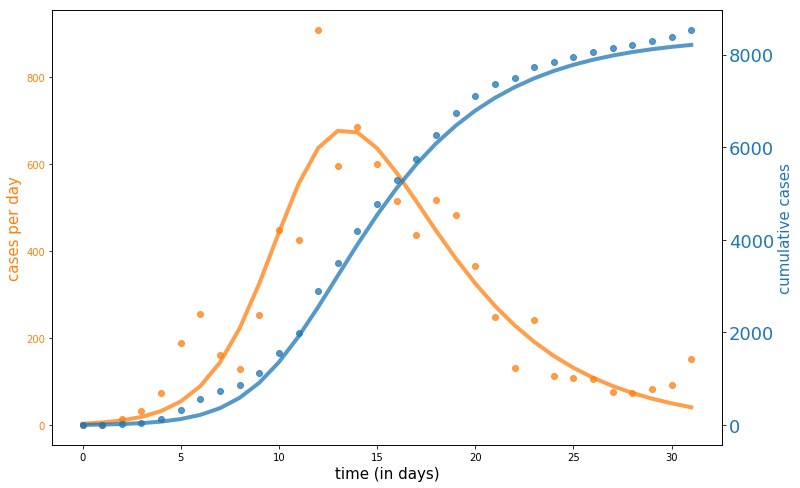

In [3]:
i_daily = df[df.Country == 'South Korea']['Cases']
i_cumulative = df[df.Country == 'South Korea']['Cases_Cumulative']
beta, gamma, r_naught = SIR_optimize(i_daily, i_cumulative, 'South Korea', init_pop=2000)
print('beta = %.3f, gamma =%.3f, R0 = %.2f' %(beta, gamma, r_naught))

beta = 0.520, gamma =0.122, R0 = 4.25


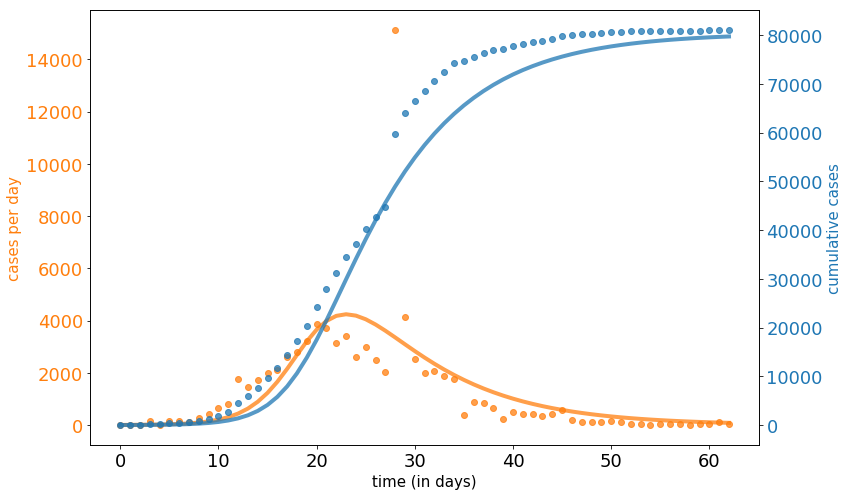

In [4]:
i_daily = df[df.Country == 'China']['Cases']
i_cumulative = df[df.Country == 'China']['Cases_Cumulative']
beta, gamma, r_naught = SIR_optimize(i_daily, i_cumulative, 'China', init_pop=10000)
print('beta = %.3f, gamma =%.3f, R0 = %.2f' %(beta, gamma, r_naught))

#### <font color = "#333333">Step 3: With the fitted parameters you can now make projections</font>

For illustration, let us consider South Korea with $\beta$ = 0.76 and $\gamma =.23$ with $R_0 = 3.34$.

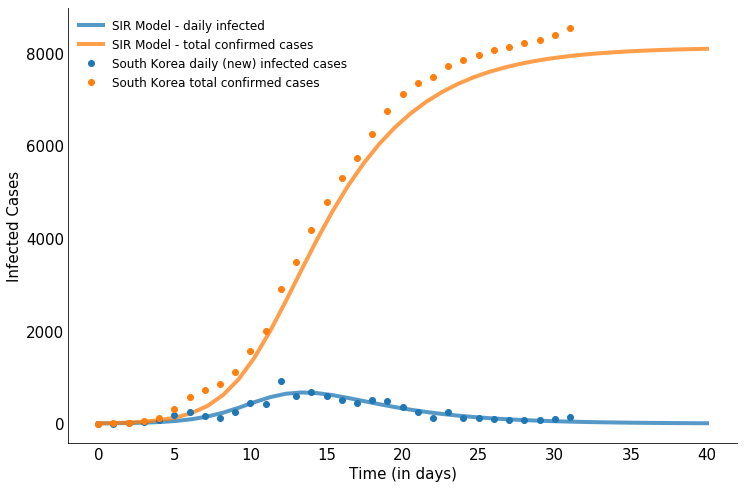

In [5]:
i_daily = df[df.Country == 'South Korea']['Cases']
i_cumulative = df[df.Country == 'South Korea']['Cases_Cumulative']
SIR_fit_param(i_daily, i_cumulative, init_pop = 2000, country = 'South Korea', \
              b = 0.76, g = 0.23, r_naught = 3.34)

The resulting SIR curves from the parameters obtained above are shown below.

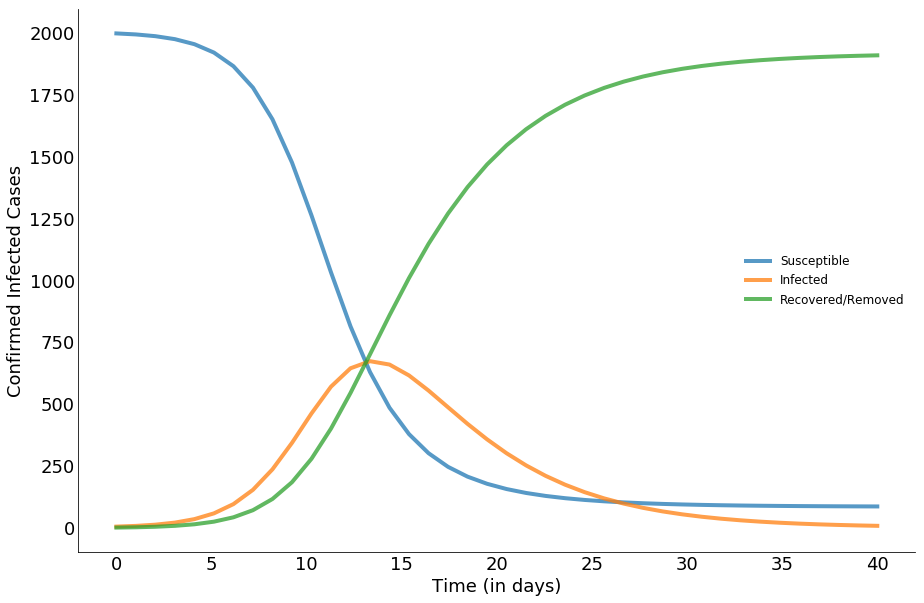

In [6]:
i_daily = df[df.Country == 'South Korea']['Cases']
i_cumulative = df[df.Country == 'South Korea']['Cases_Cumulative']
SIR_curves(i_daily, i_cumulative, init_pop = 2000, country = 'South Korea', \
           b = 0.76, g = 0.23, r_naught = 3.34)

#### <font color = "#333333">Step 4: Model Scenarios</font> 

##### Scenario A: Lowering of transmission at the onset
Let's assume the government intervenes agressively and imposes quarantine at the onset, lowering the effective transmission contact $\beta$. How will the resulting curves look like? (We focus on the above red curve, which is also known as the incident epidemic curve.)

The `beta_list` indicates the different $\beta$ values being explored.

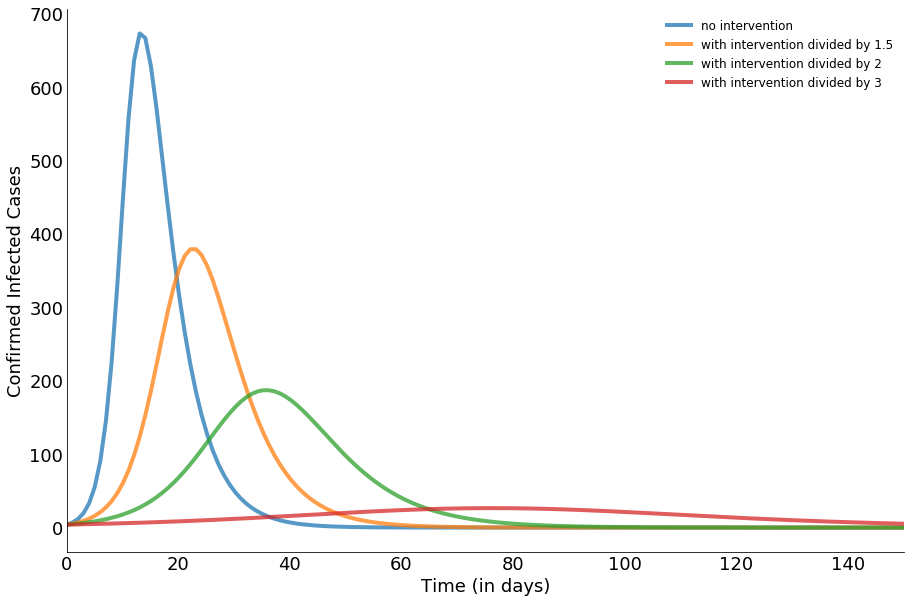

In [7]:
beta_list = [.763, 0.509, 0.382, 0.27]
rnaught_list = [3.34, 2.22, 1.67, 1.18]
labels = ['no intervention', 'with intervention divided by 1.5',\
          'with intervention divided by 2', 'with intervention divided by 3']
SIR_curves_scenarios(init_pop = 2000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, x_range = np.linspace(0, 150, 150), \
                     labels = labels, g = 0.23)

Notice from this idealized model that if $\beta$ becomes lower than $\gamma$, then the epidemic will die quickly since recovery is faster than infection. Alternatively, it can be demonstrated that as long as one can reduce the susceptible to a value lower than $p_c \sim 1- \frac{\gamma}{\beta} \sim 1- \frac{1}{R_0}$, then you the entire population can be protected. This is known as the **critical vaccination fraction $p_c$** and reflects the number of population you need to immunize to make sure the spreading will not progress. Aptly, $\frac{1}{R_0}$ is known as the **critical vaccination threshold**. 

We plot below the cumulative number of infected cases below and notice how the total number of infected individuals in a population declines as a function of reduction of $R_0$.

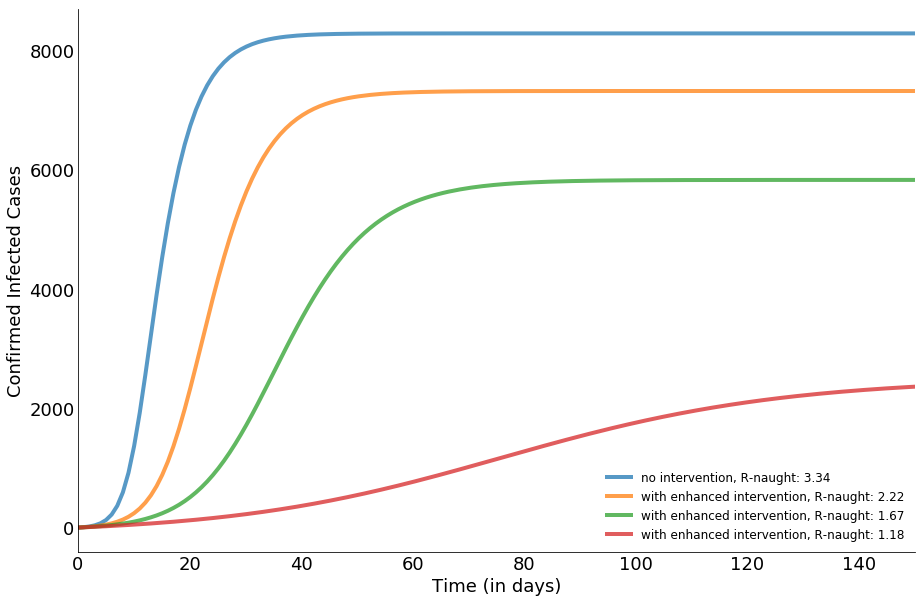

In [8]:
SIR_curves_scenarios(init_pop = 2000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, x_range = np.linspace(0, 150, 150), \
                     labels = labels, g = 0.23, cumulative = True)

It is important to note that the above results were fitted not with the absolute number of the entire population but with the number of susceptible population. In a result reported by the group of Bettencourt from Sta. Fe, they showed that, in general, the number of cumulative infected cases is proportional to city size, which is generally intuitive. 

##### Scenario B: Lowering of transmission when the epidemic has started: Intervention before it hits the peak

Let's assume the intervention, say a community quarantine, happens on the seventh day, lowering the effective transmission contact $\beta$. How will the curves look? (Focus on the red curve, also known as the incident epidemic curve.)

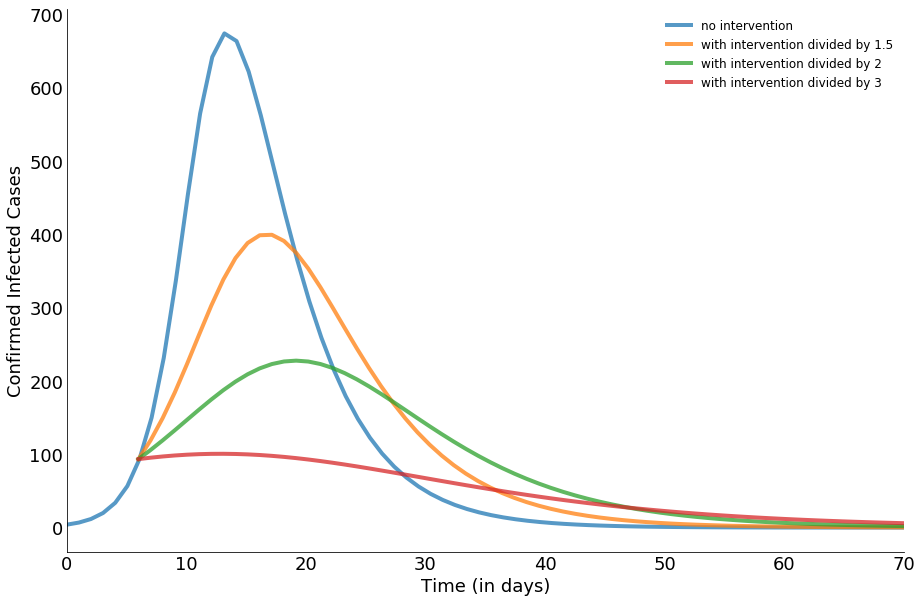

In [9]:
SIR_curves_scenarios(init_pop = 2000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, x_range = np.linspace(0, 70, 70), \
                     labels = labels, g = 0.23, with_intervention = 7)

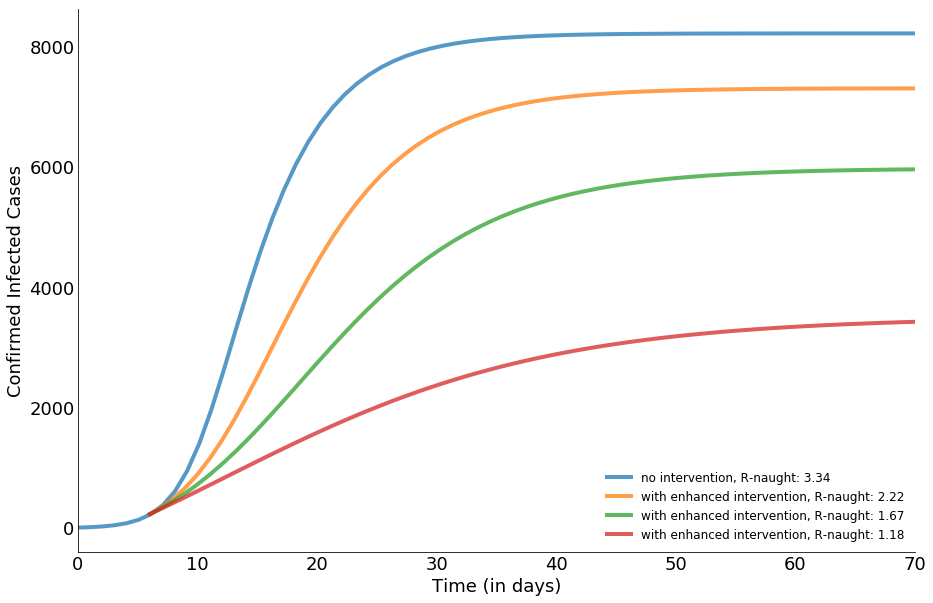

In [10]:
SIR_curves_scenarios(init_pop = 2000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, \
                     x_range = np.linspace(0, 70, 70), \
                     labels = labels, g = 0.23, \
                     with_intervention = 7, cumulative=True)

The result indicates that intervention is always good as long as it is implemented on the increasing stage of the epidemic. But what happens if the intervention is done after the peak, say day 20 of the above curve?

##### Scenario C:  Intervention after the "peak"

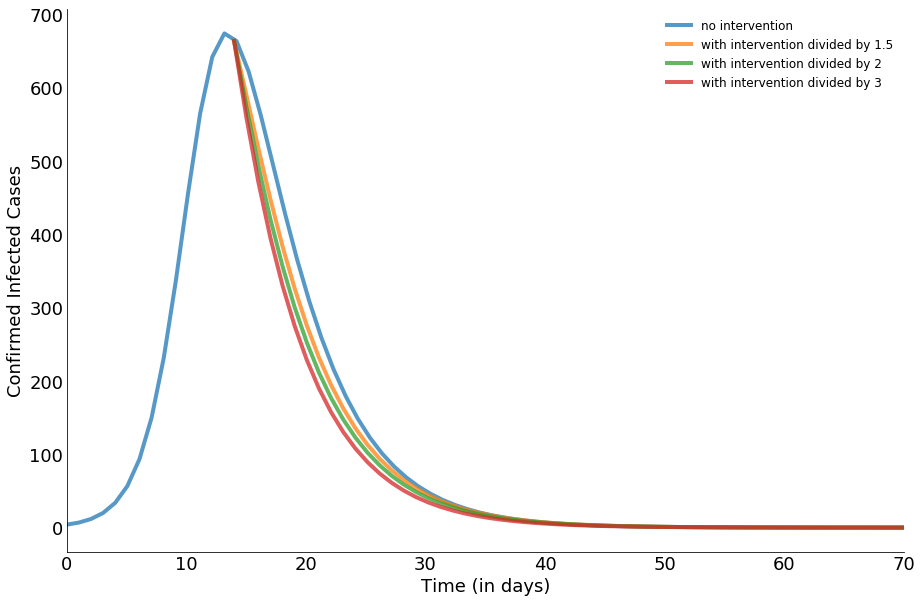

In [11]:
SIR_curves_scenarios(init_pop = 2000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, x_range = np.linspace(0, 70, 70), \
                     labels = labels, g = 0.23, with_intervention = 15)

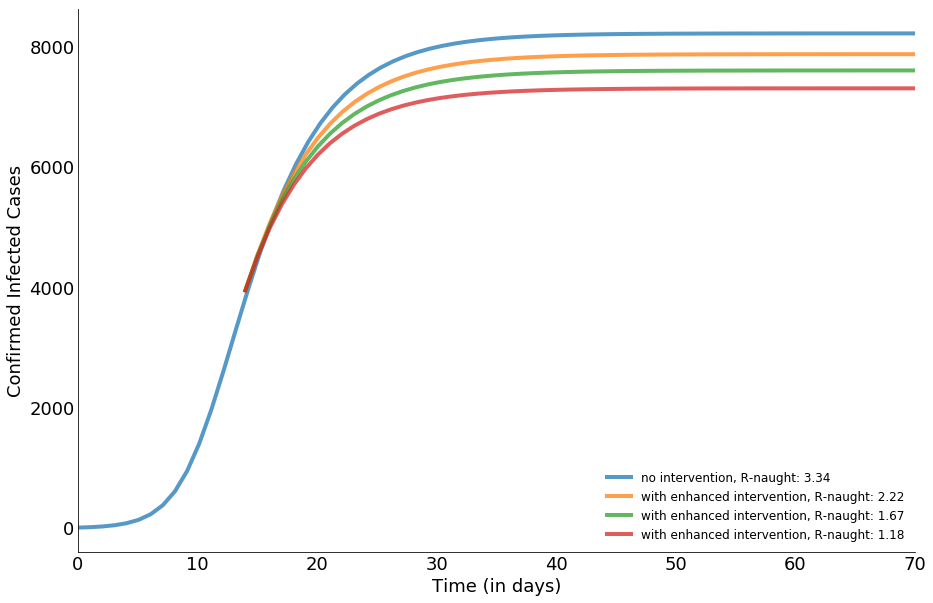

In [12]:
SIR_curves_scenarios(init_pop = 2000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, x_range = np.linspace(0, 70, 70), \
                     labels = labels, g = 0.23, with_intervention = 15, cumulative=True)

As seen above, when intervention is imposed after the peak, only  a marginal decrease in the infected cases is observed. Hence, time is essential in the intervention.

##### Scenario D. The Philippine case

Let us use the parameters we have derived in the initial part of this lecture to project for the Philippine setting, with $\beta=.338$ and $\gamma=0.20$.

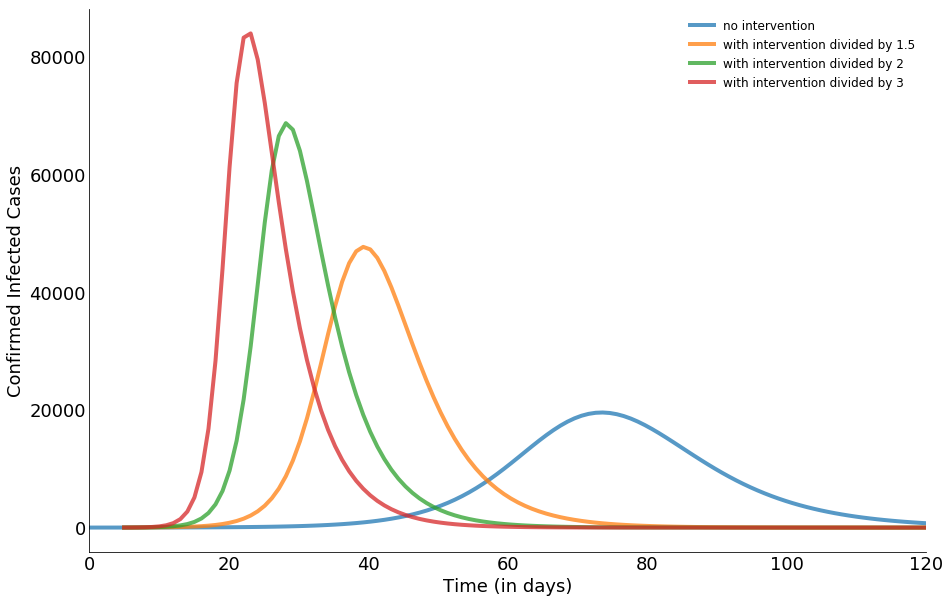

In [13]:
beta_list = [.338, .507, .676, .845]
rnaught_list = [1.69, 2.54, 3.34, 4.18]
SIR_curves_scenarios(init_pop = 200000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, x_range = np.linspace(0, 120, 120), \
                     labels = labels, g = 0.20, with_intervention = 6)

Using this model, if we assume that 01 March 2020 is day zero, then we are looking at a range of 22 to 55 days as peaks; and then, they eventually settle to the "flattened" curve about 40 to 110 days later. This is the result we are seeing in the media from different groups.

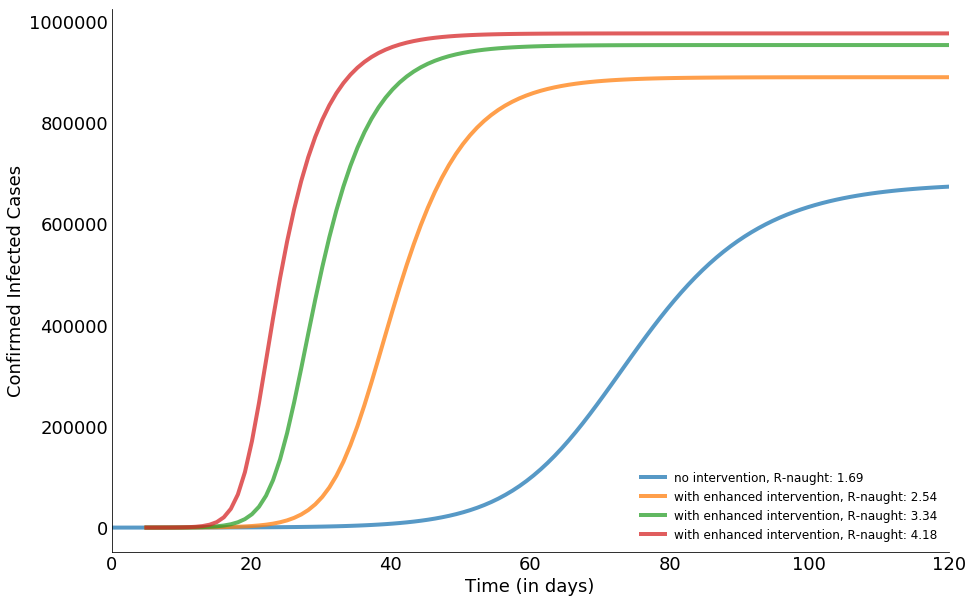

In [14]:
beta_list = [.338, .507, .676, .845]
rnaught_list = [1.69, 2.54, 3.34, 4.18]
SIR_curves_scenarios(init_pop = 200000, beta_list = beta_list, \
                     rnaught_list = rnaught_list, x_range = np.linspace(0, 120, 120), \
                     labels = labels, g = 0.20, with_intervention = 6, cumulative=True)

##### Consider the case when $R_0 \sim 4.18$ let us look at difference quarantine scenarios.

## <font color = "darkblue">Final Notes:</font>

The results derived in this notebook are baseline results. They were worked out not because I believe they are accurate, but mainly as a means to simulate the results covered by various groups globally (US government, UK, South Korea, Singapore, China, etc) and locally (UP, Ateneo, AIM (not our team), and other data science groups).

SIR model is an idealization. Note that the proportionality of the rates can take any form and not just linear, i.e. instead of $\frac{di}{dt}$ linearly proportional to $i$. It can be nonlinearly proportional in general as $f(i) ~ i^3/4$. Alternatively, the parameters $\alpha$ and $\beta$ can be time dependent.  There exists significant variation for these models to accurately describe for example the spreading of West Nile Virus, Cholera, Anthrax, Zika, Sars, etc. A good reference on theses variations are discussed [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6002118/). 

Note that our team only made short term claims at the exponential growth phase because the most predictable component of this empirical model is the onset dynamics, which is relevant to model worst case scenarios (when there are no interventions). The uncertainly is mainly a result of the nature of COVID-19. While other diseases like measles and SARS have obervable symptoms, it has been shown that it can take up to 11.5 days before the symptom of COVID would appear, and hence, trend forecasts within this time frame will most likely be accurate as it will not give a caution to susceptible population.

**Why is the chance of having one infected patient very high?**

*short answer:  COVID19 is invisible to the naked eye and senses and can be present everywhere, even in air.*

All we need to remember is this: the above model starts from one to very few infected cases and eventually exponentially afterwards. Right now, it has already reached 210+ countries including those that have almost zero tourists/visitors. Why?

1. The virus can stay up to 2-3 hours in air and 8 hours to 3 days in surface.   
2. Virus is asymptomatic up to 11 days.

**Why is the prediction not easy?**

3. Because the virus spreads fast and is sneaky as in (1) and (2).   
4. It is very fatal (current fatality rate of $6.5\%$<font color="green">\*\*</font>) forcing uncertain intervention protocols where the extent of efficiency is unknown. This makes modeling chaotic and inaccurate as parameters are both dynamic and require quality data. Take South Korea, Hongkong, and Singapore, for example. Any new development in reported cases forces the government to change containment strategies as needed. And, every new strategy changes both $\beta$ and $N$ in our model scenario.

<font color="green">\*\*</font> This number can, of course, change (go lower) once more data come in.


**If everyone will most likely be infected, why do we need to do "mass testing" and not simply assume everyone has it?**

5. Planning: We cannot be on lockdown for an extended period of time since such will result to economic woes that could be far worse than what we currently are going through that COVID-19 has caused. Hence, ascertaining the level of infected population will allow us to intelligently plan our next steps. Note that one take away from the above modeling is while we might be uncertain of its accuracy we are certain that quarantine and other forms of transmissivity reduction can control the spread of infected individuals. If we can spread the infection to within a manageable level within a given time, then we can be assured that our healthcare system will not be stressed beyond its capacity. Essentially, we can divide the pressure to our health care system by spreading it over a longer time period.

6. Health monitoring: About 50% of death cases in the Philippines got confirmation of being positive to COVID-19 72 hours, on average (3 days), after their death (up to first week of April data). Mass testing will ensure that proper medical treatment is given to those who are infected. Knowing that one is negative is also important. Case in point:  a patient was cremated without his loved ones because they thought he was COVID-19 infected. Three days later, the results arrived: he was negative from COVID-19. Unfortunately, during his final moment, he was not given the chance to be with his family.





### <font color = "darkblue">2.4  From SIR to SEIR Model</font>


In many infectious diseases, there is an exposed period needed for $E$ individuals before they can be contagious. The exposed period is a latent period after transmission of infection but before the infected individual can transmit the infection. During this time the pathogen is in the host, but in significantly low numbers so that the host is not yet considered infectious. The inclusion of $E$ ($e=E/N$) in SIR model is referred to as SEIR model. For COVID19 particularly, there are claims that within 5 days after infection the amount of COVID19 virus is not sufficient for an infected individual to spread infection. 

<img src="SEIRModel.png" style="height:200px">

\begin{equation}
\frac{ds}{dt} = \mu (1 - s) - \beta s i -\nu s \\
\frac{de}{dt} = \beta s i - (\nu + \sigma) e  \\
\frac{di}{dt} = \sigma e - (\nu + \gamma) i  \\
\frac{dr}{dt} = \gamma i - \nu r
\end{equation}

where again the conservation constraints dictate that: 

\begin{equation}
s + e + i + r = 1  \\
\frac{ds}{dt} + \frac{de}{dt} + \frac{di}{dt} + \frac{dr}{dt} =0
\end{equation}

Consistent with SIR the variable definitions remain as:

$\beta$ - Effective contact rate and controls how often a susceptible-infected contact results in a new exposure.    
$\gamma$ - Removal rate or the rate an infected recovers and become resistant to infection.   
$\sigma$ - Progression rate or the rate from exposed (latent) to infected.  
$\mu$ - Natural mortality rate.   
$\nu$ - ''birth'' rate at which vaccination is implemented to susceptible population.   

Since no vaccine is yet available and if we assuming that susceptible population are not dying of other diseasses, we can simplify the above equation by putting $\mu \sim 0;  \nu \sim 0$ simplifying the SEIR model as:



\begin{equation}
\frac{ds}{dt} =  - \beta s i \\
\frac{de}{dt} = \beta s i - \sigma e  \\
\frac{di}{dt} = \sigma e - \gamma i  \\
\frac{dr}{dt} = \gamma i 
\end{equation}

Notice that the main difference of this model with SIR is the addition of another rate equation in $\frac{de}{dt}$ and the addition of another constant related to such equation given by $\sigma$. The rule of $\sigma$ is to naturally delay the curve and lower the number of infected population. For this case (\mu and \nu are zero) SEIR approaches SIR as $\sigma$ approaches larger values, when $\sigma$ is very low (near zero) it means exposed individuals will not be infectious and $I$ will quickly dissipates. By looking at the characteristic equation of the Jacobian, we can derive the reproductive rate $R_0$ as:


\begin{equation}
R_0= \frac{\sigma \beta}{(\nu + \sigma)(\nu + \gamma)}
\end{equation}


Note that in the absence of latent state, the reproductive number $R_0 \sim \frac{\beta}{\gamma} as before.




#### <font color = "#333333">Implementation of SEIR model</font>

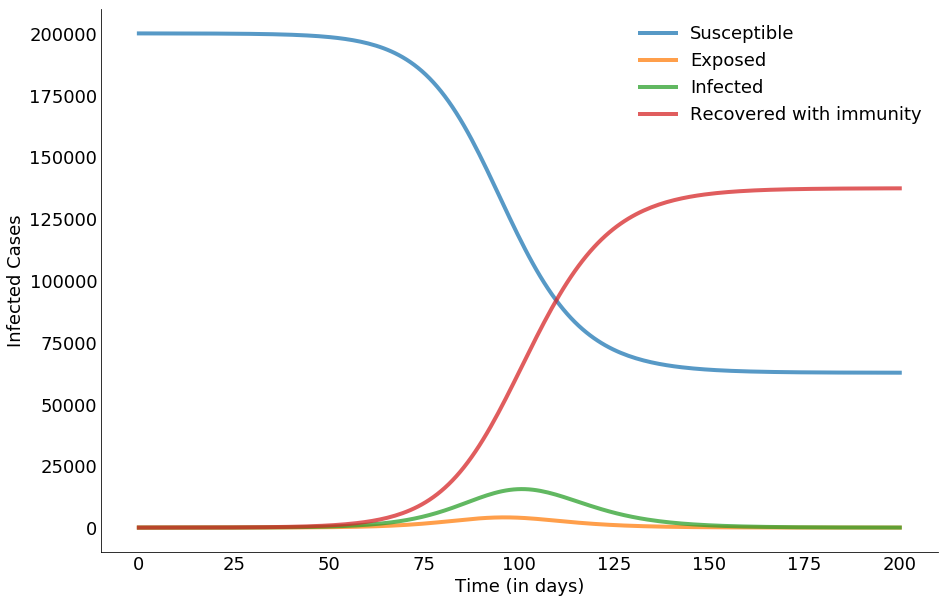

In [15]:
# beta = Contact rate
# gamma = mean recovery rate (in 1/days)
# Initial Susceptible population
# sigma = rate at which an exposed person becomes infective, assume the virus stays for ~24 days 
# and 19 of those it is infectious - latency of 5 days

SEIR_curves(beta = 0.338, gamma = 0.20, N = 200000, sigma = 19/24, \
            t = np.linspace(0, 200, 200))

Notice that such an assumption will not allow us to recover the initial curve. Two main visible difference by inspection: (1) peak moves from about 70 days to 100 days and (2) the peak infected cases decreased from about 20,000 cases to a little above 16,000. Since the previous result is fitted from an actual data, the corresponding SEIR model must be modified from $N=200,000$,$\beta = 0.338$ and $\gamma=0.200$ to $\beta = 0.338$ but with $\gamma=0.135$ (decrease by $30\%$) and number of susceptible to half (N=100,000) with $\sigma \sim 19/24$ to account for a similar results. The above solution is not unique demonstrating another room for "creative" interpretation.

Main point here: SIR model is derivable from SEIR, but interpretation is now different!

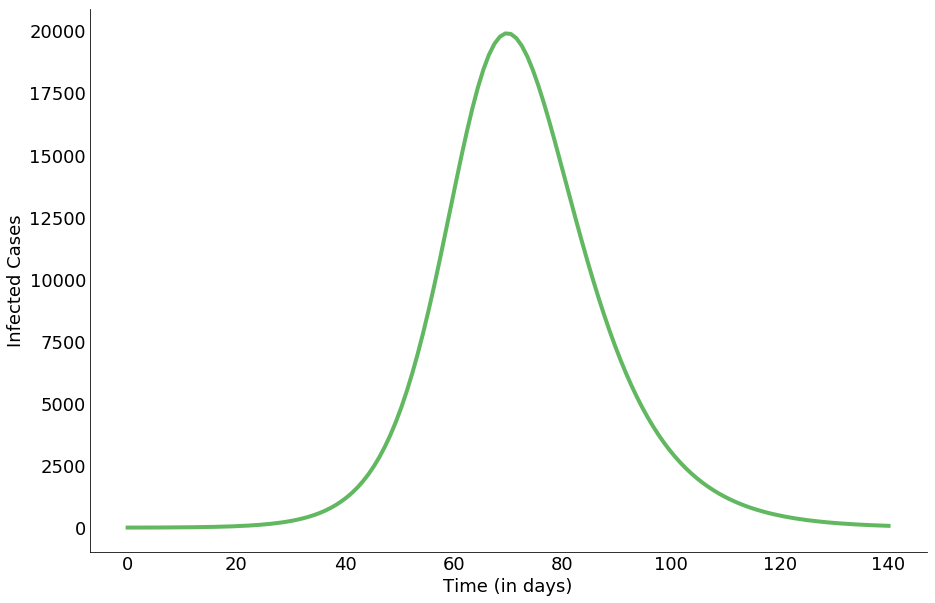

In [16]:
SEIR_curves(beta = 0.338, gamma = 0.135, N = 100000, sigma = 19/24, \
            t = np.linspace(0, 140, 140), infected_only = True)

### <font color = "darkblue">Appendix 1: Exercise on variation of SIR models</font>


#### Exercise 4. Suppose the SIR model is written instead as 

\begin{equation}
\frac{ds}{dt} = - \beta s i  \\
\frac{di}{dt} = \beta s - \gamma i  \\
\frac{dr}{dt} = \gamma i
\end{equation}

that is we assume that the rate of infection $\frac{di}{dt}$ is proportional only to the transmission probablity $\beta$ of susceptible population and negatively correlated to $i$ via $\gamma$. Derive the exact analytic solution and plot resulting dynamics. Show that such will have problem getting the onset of infected properly. Explain why?

#### Solution:

 Replacing $s$ by $s =1-i-r$ in the $i$-equation we get:


\begin{equation}
\frac{di}{dt}=\beta(1-i-r) - \gamma i \\
\frac{di}{dt}= - (\beta + \gamma) i - \beta (r-1) \\ 
\end{equation}

taking the time derivative of both sides we get:

\begin{equation}
\frac{d^2i}{dt^2} + (\beta + \gamma) \frac{di}{dt} + \beta \frac{dr}{dt} =0 
\end{equation}

 inserting the $r$-equation ($\frac{dr}{dt}=\gamma i$) we get a second order linear differential equation as:
 
 \begin{equation}
\frac{d^2i}{dt^2} + (\beta + \gamma) \frac{di}{dt} + \beta \gamma  i =0 
\end{equation}

with $a=1$, $b=\beta + \gamma$, $c =  \beta \gamma$, the general solution to the above equation is given by:


\begin{equation}
i = \exp^{-bt/2a} (A \cosh (\Delta t / 2a)) + B \sinh(\Delta t / 2a))
\end{equation}

where $\Delta = \sqrt{ b^2 - 4ac}$=$\sqrt{(\beta + \gamma)^2-4\beta \gamma}$ = $\beta - \gamma$.

Noting that as $t =0 $ the $i \to 0$, we can immediately conclude that A =0 and the solution is: 

\begin{equation}
i = B \exp^{-bt/2a}  \sinh(\Delta t / 2a)
\end{equation}

or substituting the variables

\begin{equation}
i =  B \exp^{-(\beta + \gamma)t/2}  \sinh((\beta - \gamma)t / 2)
\end{equation}


The plot of this function is shown below. Again, to recover $y$ in the logistic discussion, we integrate this result and we get:

\begin{equation}
y = \int^t_0 i dt =  \int^t_0 \exp^{-bt/2a} B \sinh(\Delta t/ 2a) dt =  \int^t_0 B \exp^{-bt/2a} \frac{\exp^{\Delta t/ 2a} - \exp^{-\Delta t/ 2a}}{2} dt
\end{equation}

The result can be simplified as evaluated from $t=0$ to $t$:

\begin{equation}
dy  = B \frac{\gamma_2 \exp^{\gamma_1 t} - \gamma_1 \exp^{\gamma_2 t}}{c}
\end{equation}

where $\gamma_1 = \frac{-b + \Delta}{2a} = -\gamma$ and $\gamma_2 = \frac{-b - \Delta}{2a}=-\beta$.

with the limit of integration this simplifies to:

\begin{equation}
y = \frac{1}{4} B (\frac{\exp^{-\beta t}}{\beta} - \frac{\exp^{-\gamma t}}{\gamma} - \frac{1}{\beta} +\frac{1}{\gamma})
\end{equation}

or 

\begin{equation}
y = \frac{1}{2} (\frac{1- \exp^{-2 \gamma t}}{\gamma (1 + \exp^{-\gamma t})} - \frac{1- \exp^{-2 \beta t}}{ \beta (1 + \exp^{-\beta t})})
\end{equation}


Notice that as $t$ increases $1- \exp^{-2 \gamma t} \sim 1$ and the result resembles the logistic curves describe in section 1.


\begin{equation}
y \sim \frac{1}{2} (\frac{\gamma^{-1} }{(1 + \exp^{-\gamma t})} - \frac{ \beta^{-1} }{(1 + \exp^{-\beta t})})
\end{equation}


A comparison of the best fit curve using this expression and that of a logistic in section 1 is given below. Notice the above modified SIR model fails to account for the curvature at the onset. While this model fails note that there are infinite variations possible for SIR model as the proportional can be nonlinear.


#### Load the Country Data

In [17]:
df = pd.read_excel('epi-data-pp.xlsx')
countries = ['Philippines', 'China', 'South Korea', 'Iran', 'USA', 'Italy', 'UK', 'France']

#### Plot the resulting curves

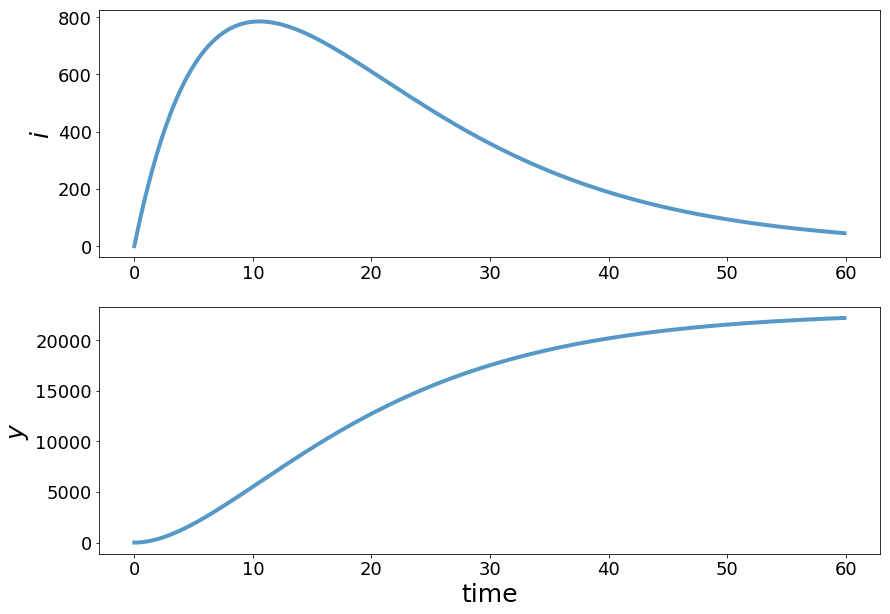

In [18]:
def i_curve(t, B, beta, gamma):
    #return np.exp(-(beta+gamma)*t/2)*(A*np.cosh((beta-gamma)*t/2) + B*np.sinh((beta-gamma)*t/2))
    return B*np.sinh((beta-gamma)*t/2)*np.exp(-(beta+gamma)*t/2) 
def y_curve(t, B, beta, gamma):
    return B*.5*((np.exp((-beta*t))/(beta)) - (np.exp((-gamma*t))/(gamma)) -(1/beta)+(1/gamma))
    #return B*.5*((np.exp((-beta*t)/beta))-(1.0/beta))

B = 14000
beta = .11
gamma = .081

t_i = np.arange(0, 60, 0.1)
t_y = np.arange(0, 60, 0.1)

main_canvas = plt.figure(figsize = (14, 10))
plot_canvas = plt.subplot(2, 1, 1)
plot_canvas.plot(t_i, i_curve(t_i, B, beta, gamma), lw = 4, alpha = 0.75)

plot_canvas.set_ylabel('$i$', size = 25)

plot_canvas = plt.subplot(2, 1, 2)
# plot_canvas.plot(t_y, y_curve(t_y, B, beta, gamma), 'g', ms = 10, mew = 2, 
#                  mfc = "green", mec = "green")
plot_canvas.plot(t_y, y_curve(t_y, B, beta, gamma), lw = 4, alpha = 0.75)


plot_canvas.set_xlabel('time', size = 25);
plot_canvas.set_ylabel('$y$', size = 25);

#### Using the analytical result in fitting the actual data for South Korea

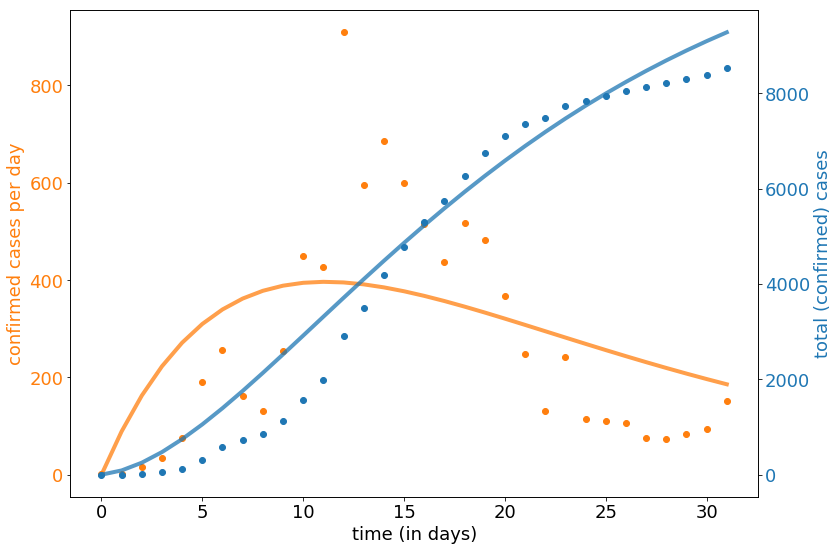

beta = 0.103, gamma =0.079, R0 = 1.31


In [19]:
I_daily = df[df.Country == 'South Korea']['Cases']
I_cumulative = df[df.Country == 'South Korea']['Cases_Cumulative']
t= np.arange(0, len(I_daily))

def i_curve(t, beta, gamma):
    #return np.exp(-(beta+gamma)*t/2)*(A*np.cosh((beta-gamma)*t/2) + B*np.sinh((beta-gamma)*t/2))
    return B*np.sinh((beta-gamma)*t/2)*np.exp(-(beta+gamma)*t/2) 
def y_curve(t, B, beta, gamma):
     return B*.5*((np.exp((-beta*t))/(beta)) - (np.exp((-gamma*t))/(gamma)) -(1/beta)+(1/gamma))

#DEFINE PARAMETERS 
B = 8000
beta = .4
gamma = .2

popt, pcov = curve_fit(i_curve, t, I_daily, p0 = [beta, gamma])
y_fit = i_curve(t, *popt)  #fitted projection
y_fit_cum = np.cumsum(y_fit) #cumulative sum of the projection

#PLOTTING THE RESULTS
fig, ax1 = plt.subplots( figsize=(12,8))

plt.rcParams.update({'font.size': 18})
color = tab10[1]
ax1.set_xlabel('time (in days)')
ax1.set_ylabel('confirmed cases per day', color=color)
ax1.plot(t, I_daily,'o', color=color)
ax1.plot(t, y_fit, lw = 4, alpha = 0.75, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

# Infected Cases - Cumulative
plt.rcParams.update({'font.size': 18})
color = tab10[0]
ax2.set_ylabel('total (confirmed) cases', color=color)  # we already handled the x-label with ax1
ax2.plot(t, I_cumulative,'o', color=color)
ax2.plot(t, y_fit_cum, lw = 4, alpha = 0.75, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.show()

print('beta = %.3f, gamma =%.3f, R0 = %.2f' %(popt[0],popt[1],popt[0]/popt[1]))

Main conclusion: There are infinite variations possible when writing SIR model. However, inability to account for actual dynamics might result to poor generalization of the results.